In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import datetime as dt

%matplotlib inline

In [2]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# Ajustando os valores ausentes (missing values)

In [3]:
s = df.isnull().sum()
print(s)

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


In [4]:
missing = pd.DataFrame({'feature': s.index, 'missing': s.values})
missing = missing.set_index('feature')
print(missing)

              missing
feature              
show_id             0
type                0
title               0
director         2389
cast              718
country           507
date_added         10
release_year        0
rating              7
duration            0
listed_in           0
description         0


In [5]:
missing['% missing'] = ((missing['missing'] / df.shape[0]) * 100).round(2)
print(missing.sort_values('% missing', ascending=False))

              missing  % missing
feature                         
director         2389      30.68
cast              718       9.22
country           507       6.51
date_added         10       0.13
rating              7       0.09
show_id             0       0.00
type                0       0.00
title               0       0.00
release_year        0       0.00
duration            0       0.00
listed_in           0       0.00
description         0       0.00


## Algumas colunas podem ser excluidas, pois nao trazem valor para a analise exploratoria:

* director
* cast

In [6]:
df.drop(['director', 'cast'], axis=1, inplace=True)

In [7]:
df.isnull().sum()

show_id           0
type              0
title             0
country         507
date_added       10
release_year      0
rating            7
duration          0
listed_in         0
description       0
dtype: int64

### As colunas 'date_added' e 'rating' muitos poucos registros nulos, portanto serao excluidos e nao causarao ruidos nas analises seguintes

In [8]:
df.dropna(subset=['date_added', 'rating'], inplace=True)

In [9]:
df.isna().sum()

show_id           0
type              0
title             0
country         505
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

### Filmes sem definicao de pais ('country') receberao o rotulo "N/D" (not defined) e ficarao agrupados nessa condicao nas analises posteriores

In [10]:
df['country'] = df['country'].fillna(value='N/D')

df.isna().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### Agora temos um dataframe devidamente ajustado em relacao aos dados ausentes

In [11]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# Trabalhando com os dados

### Sera criada uma coluna com apenas o ano em que o filme/serie foi adicionado ao Netflix, para que possamos fazer uma estimativa da "idade" desse conteudo quando chegou na plataforma.

* Separacao das colunas em mes, ano e uniao de ambas

In [12]:
# Mes
df['month_added'] = df['date_added'].str.split(' ').str[0]

# Ano
df['year_added'] = df['date_added'].str[-4:]

# Uniao
df['period_added'] = df.month_added + '/' + df.year_added

In [13]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,period_added
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,2020,August/2020
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,2016,December/2016
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,2018,December/2018
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,2017,November/2017
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January,2020,January/2020


### Ajuste no tipo de dado para cada coluna

In [14]:
df.dtypes

show_id         object
type            object
title           object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
month_added     object
year_added      object
period_added    object
dtype: object

* Datas 

In [15]:
df['release_year'] = pd.to_datetime(df['release_year'], format='%Y')
df['release_year'] = df['release_year'].dt.year

df['year_added'] = pd.to_datetime(df['year_added'], format='%Y')
df['year_added'] = df['year_added'].dt.year

In [16]:
df = df.astype({'type':'category', 'rating':'category'})

In [17]:
df.dtypes

show_id           object
type            category
title             object
country           object
date_added        object
release_year       int64
rating          category
duration          object
listed_in         object
description       object
month_added       object
year_added         int64
period_added      object
dtype: object

In [18]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,period_added
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,2020,August/2020
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,2016,December/2016
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,2018,December/2018
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,2017,November/2017
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January,2020,January/2020


## Proporção entre filmes e séries lançados no período

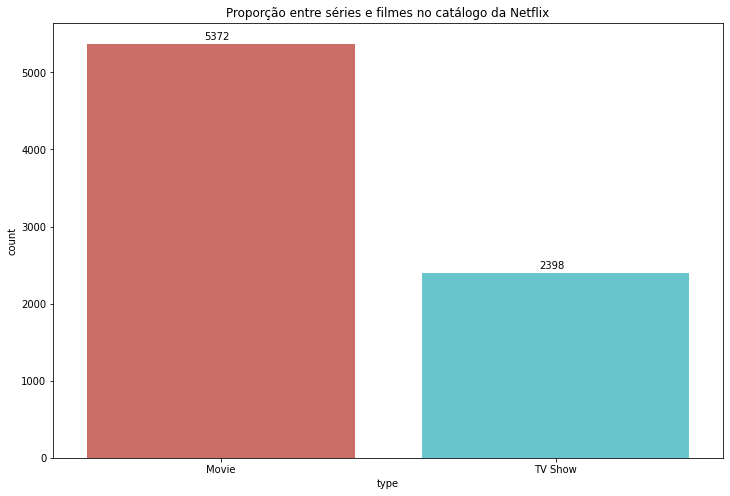

In [19]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='type', data=df,palette='hls')
plt.title('Proporção entre séries e filmes no catálogo da Netflix')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+50))

* A maior parcela dos títulos da Netflix são de filmes até o momento, com um pouco mais que o dobro do número de séries. Vamos observar esse comportamento com base nos anos de entrada desses títulos no catálogo:

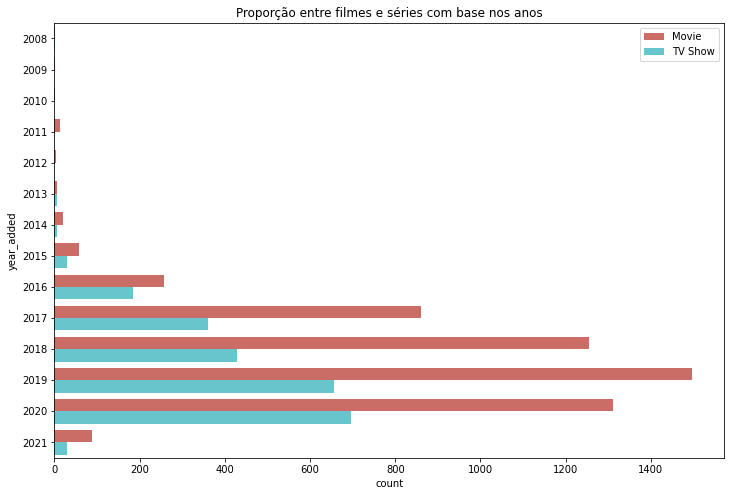

In [20]:
plt.figure(figsize=(12,8))
sns.countplot(y='year_added', hue='type', data=df, palette='hls')
plt.title('Proporção entre filmes e séries com base nos anos')
plt.legend(loc='upper right')

* Percebemos que, em todos os anos, o comportamento de inclusão de mais filmes do que séries é mantido (a destacar que o ano de 2021 ainda não foi concluído no tempo dessa análise, portanto ainda tem chances de apresentar um cenário alternativo).

### Títulos por países

In [21]:
titulos_pais = df.groupby(['country']).size().reset_index(name='counts').sort_values(by='counts', ascending=False).nlargest(15, columns='counts')
print(titulos_pais)

            country  counts
550   United States    2546
229           India     923
316             N/D     505
463  United Kingdom     396
291           Japan     224
395     South Korea     183
51           Canada     177
404           Spain     134
147          France     115
137           Egypt     101
308          Mexico     100
449          Turkey     100
12        Australia      81
440          Taiwan      78
39           Brazil      72


Para a análise por países, a classificação "N/D" não será útil na análise, portanto será utilizado um dataframe sem os valores que não possuem país definido.

In [22]:
pais_clean = df[df['country'] != 'N/D']

In [23]:
pais_clean['country'].value_counts()

United States                                2546
India                                         923
United Kingdom                                396
Japan                                         224
South Korea                                   183
                                             ... 
France, Morocco                                 1
United Kingdom, Singapore                       1
Austria, Iraq, United States                    1
South Korea, Canada, United States, China       1
Denmark, China                                  1
Name: country, Length: 681, dtype: int64

In [24]:
titulos_pais_clean = pais_clean.groupby(['country']).size().reset_index(name='counts').sort_values(by='counts', ascending=False).nlargest(15, columns='counts')
print(titulos_pais_clean)

            country  counts
549   United States    2546
229           India     923
462  United Kingdom     396
291           Japan     224
394     South Korea     183
51           Canada     177
403           Spain     134
147          France     115
137           Egypt     101
308          Mexico     100
448          Turkey     100
12        Australia      81
439          Taiwan      78
39           Brazil      72
350     Philippines      71


Text(0.5, 1.0, 'Quantidade de títulos incluídos no Netflix por país (Top 15)')

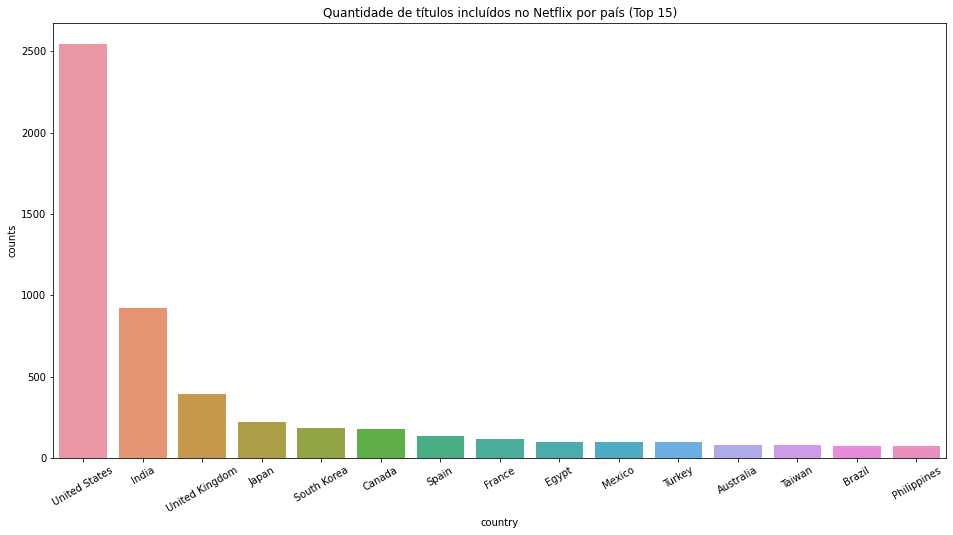

In [25]:
plt.figure(figsize=(16,8))
sns.barplot(x='country', y='counts', data=titulos_pais_clean)
plt.xticks(rotation=30)
plt.title('Quantidade de títulos incluídos no Netflix por país (Top 15)')

* Pelo gráfico, percebemos que os Estados Unidos representam a grande maioria dos títulos incluídos na plataforma, seguidos da Índia (2º lugar) e Reino Unido (3º lugar). O Brasil é o 14º país com mais produções incluídas na plataforma (desconsiderando os títulos sem país definido no dataset)

Text(0.5, 1.0, 'Títulos por país, separados em séries e filmes')

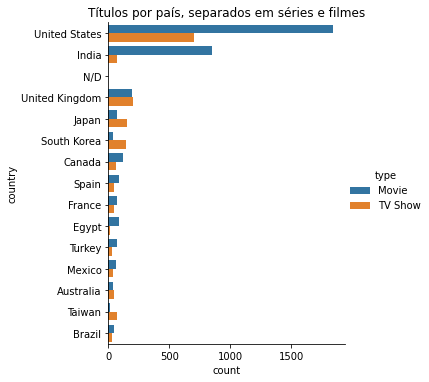

In [26]:
df2 = df.drop(df[df['country'] == 'N/D'].index)
sns.catplot(y='country', hue='type', kind='count', data=df2, order=df.country.value_counts().iloc[:15].index)
#plt.xticks(rotation = 90)
plt.title('Títulos por país, separados em séries e filmes')

* Separando a análise no tipo de conteúdo de cada país na plataforma, nos atentamos ao fato de que os dois primeiros países, Estados Unidos e Índia, apresentam um número bastante maior de filmes em relação a séries. Para os países subsequentes no ranking de conteúdo (Reino Unido, Japão e Coréia do Sul), as séries já passam a aparecer em maior número em relação aos filmes para cada país. No Brasil, temos um volume maior de filmes em relação a séries.

In [27]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,period_added
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,2020,August/2020
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,2016,December/2016
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,2018,December/2018
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,2017,November/2017
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January,2020,January/2020


### Análise por classificação indicativa

Text(0.5, 1.0, 'Quantidade de títulos classificação indicativa')

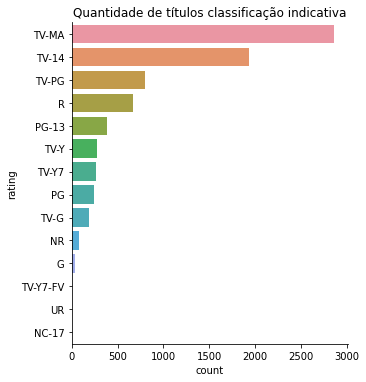

In [28]:
sns.catplot(y='rating', kind='count', data=df, order=df.rating.value_counts().iloc[:15].index)
plt.title('Quantidade de títulos classificação indicativa')

* A classificação indicativa que mais aparece na plataforma é a "TV-MA", que corresponde à "TV Mature Audience Only" - programas destinados a adultos e não recomendado para menores de 17 anos. Em seguida, temos, respectivamente, a faixa "TV-14", para públicos mais jovens e não recomendado para menores de 14 anos; e "TV-PG", para públicos no início da adolescência.

## Análise das séries

Para as análises a seguir, foi utilizado como dataset auxiliar as notas do IMDB para algumas das séries que constavam na listagem anterior da plataforma Netflix. Vale ressaltar que o conjunto de dados com avaliação das séries encurtará a listagem anterior da Netflix, pois é menor e não contém necessariamente todos os títulos de séries do dataset original.

In [29]:
df_series = pd.read_csv('series_data.csv', usecols=['Series_Title', 'Runtime_of_Episodes', 'IMDB_Rating'])
df_series.head()

,Series_Title,Runtime_of_Episodes,IMDB_Rating
0,Game of Thrones,57 min,9.3
1,Breaking Bad,49 min,9.5
2,The Walking Dead,44 min,8.2
3,Friends,22 min,8.9
4,Stranger Things,51 min,8.7


In [30]:
df_series.shape

(2000, 3)

In [31]:
df_series.isna().sum()

Series_Title            0
Runtime_of_Episodes    43
IMDB_Rating             0
dtype: int64

In [32]:
series_join = pd.merge(df_series, df, left_on='Series_Title', right_on='title')
series_join = series_join[['title','Runtime_of_Episodes', 'country', 'release_year', 'year_added', 'rating', 'duration', 'IMDB_Rating']]
series_join.head()

,title,Runtime_of_Episodes,country,release_year,year_added,rating,duration,IMDB_Rating
0,Breaking Bad,49 min,United States,2013,2013,TV-MA,5 Seasons,9.5
1,The Walking Dead,44 min,United States,2018,2019,TV-MA,9 Seasons,8.2
2,Stranger Things,51 min,United States,2019,2019,TV-14,3 Seasons,8.7
3,Sherlock,88 min,"United Kingdom, United States",2017,2017,TV-14,4 Seasons,9.1
4,Dexter,53 min,United States,2013,2018,TV-MA,8 Seasons,8.6


In [33]:
series_join.shape

(436, 8)

In [34]:
series_join.nunique()

title                  424
Runtime_of_Episodes     47
country                 67
release_year            33
year_added               9
rating                   9
duration                46
IMDB_Rating             49
dtype: int64

In [35]:
series_join.isna().sum()

title                   0
Runtime_of_Episodes    13
country                 0
release_year            0
year_added              0
rating                  0
duration                0
IMDB_Rating             0
dtype: int64

Os registros nulos serão dropados do dataset por representarem uma parcela pequena e sua substituição não ser intuitiva para as colunas em questão

In [36]:
series_join.dropna(axis=0, how='any', inplace=True)
series_join.shape

(423, 8)

Algumas inclusões de colunas no novo dataset para deixá-lo mais rico:

In [37]:
series_join['ep_duration'] = series_join['Runtime_of_Episodes'].str.split(' ').str[0]

series_join['seasons_duration'] = series_join['duration'].str.split(' ').str[0]

series_join = series_join.astype({'ep_duration':'int', 'seasons_duration':'int'})

series_join.drop(['Runtime_of_Episodes', 'duration'], axis=1, inplace=True)

In [38]:
series_join.head()

,title,country,release_year,year_added,rating,IMDB_Rating,ep_duration,seasons_duration
0,Breaking Bad,United States,2013,2013,TV-MA,9.5,49,5
1,The Walking Dead,United States,2018,2019,TV-MA,8.2,44,9
2,Stranger Things,United States,2019,2019,TV-14,8.7,51,3
3,Sherlock,"United Kingdom, United States",2017,2017,TV-14,9.1,88,4
4,Dexter,United States,2013,2018,TV-MA,8.6,53,8


### Ajustes nos tipos de dados

In [39]:
series_join.dtypes

title                 object
country               object
release_year           int64
year_added             int64
rating              category
IMDB_Rating          float64
ep_duration            int32
seasons_duration       int32
dtype: object

In [40]:
series_join = series_join.astype({'release_year':'category', 'year_added':'category', 'IMDB_Rating':'float', 'ep_duration':'int'})
series_join.dtypes

title                 object
country               object
release_year        category
year_added          category
rating              category
IMDB_Rating          float64
ep_duration            int32
seasons_duration       int32
dtype: object

### Avaliação das novas colunas numéricas

In [41]:
series_join.describe()

,IMDB_Rating,ep_duration,seasons_duration
count,423.000000,423.000000,423.000000
mean,7.621040,45.366430,13.962175
std,0.907032,33.820974,31.353110
min,3.200000,4.000000,1.000000
25%,7.200000,30.000000,2.000000
50%,7.700000,43.000000,3.000000
75%,8.200000,55.500000,5.000000
max,9.700000,542.000000,139.000000


Com a descrição das colunas numéricas apresentadas acima, temos as seguintes percepções:

* 'IMDB_Rating' (avaliação das séries) aparentemente apresenta valores sem grandes ruídos e consistentes;

* 'ep_duration' (duração dos episódios) já apresenta alguns ruídos como, por exemplo, uma duração de 542 minutos (mais de 9 horas de duração) para um episódio de série;

* 'seasons_duration' (duração da série em temporadas) também apresenta ruídos, como séries com 139 temporadas;

Vamos analisar com detalhes cada uma das features com ruídos:

* Duração dos episódios ('ep_duration')

Text(0.5, 1.0, 'Análise dos tempos de duração dos episódios (Boxplot)')

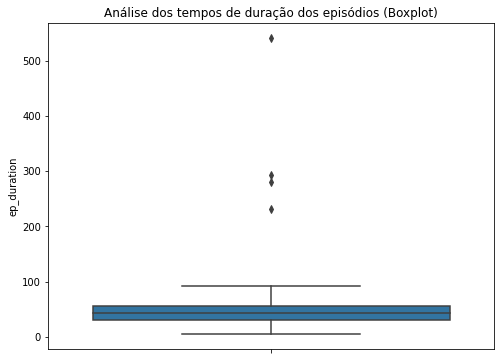

In [42]:
plt.figure(figsize=(8,6))
sns.boxplot(y='ep_duration', data=series_join)
plt.title('Análise dos tempos de duração dos episódios (Boxplot)')

Percebe-se que há alguns outliers com valores altos para um "padrão" de duração de episódio de série (todos acima de 3 horas de duração). Trataremos esses dados utiliando a regra da distância interquartil (IQR) para identificação desses outliers e substituição pela mediana da feature (não será utilizado o valor da média simples pois é muito sucetível aos ruídos dos outliers).

In [43]:
ep_dur_median = series_join['ep_duration'].median()
print(ep_dur_median)

43.0


In [44]:
q1_ep_dur = series_join['ep_duration'].quantile(0.25) # Primeiro quartil
q3_ep_dur = series_join['ep_duration'].quantile(0.75) # Terceiro quartil
iqr_ep_dur = q3_ep_dur - q1_ep_dur #IQR
out_max_ep_dur = q3_ep_dur + 1.5 * iqr_ep_dur #outliers

outliers = series_join['ep_duration'] > out_max_ep_dur
series_join[outliers] = np.nan
series_join['ep_duration'].fillna(ep_dur_median, inplace=True) 

Text(0.5, 1.0, 'Análise dos tempos de duração dos episódios - Ajuste outliers (Boxplot)')

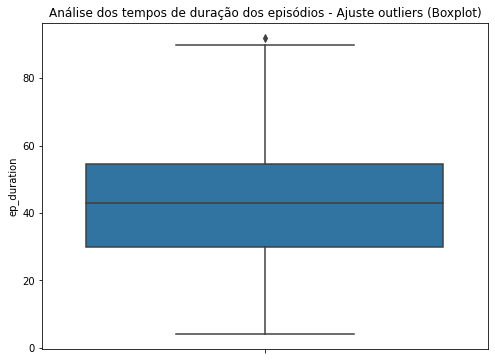

In [46]:
plt.figure(figsize=(8,6))
sns.boxplot(y='ep_duration', data=series_join)
plt.title('Análise dos tempos de duração dos episódios - Ajuste outliers (Boxplot)')

* Duração das temporadas ('seasons_duration')

Text(0.5, 1.0, 'Análise da quantidade de temporadas nas séries (Boxplot)')

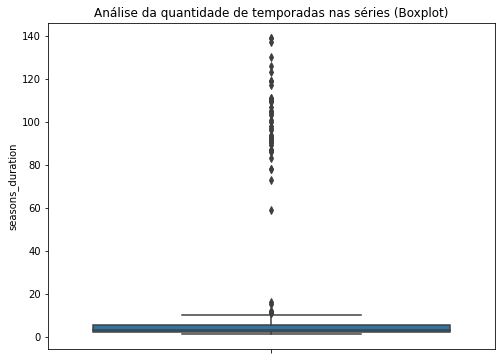

In [47]:
plt.figure(figsize=(8,6))
sns.boxplot(y='seasons_duration', data=series_join)
plt.title('Análise da quantidade de temporadas nas séries (Boxplot)')

Com a análise Boxplot, percebemos que os registros para quantidade de temporadas nas séries apresentam um grande número de outliers, muito provavelmente por inconsistência na extração dessas informações. Da mesma forma que o caso anterior (duração dos episódios), será utilizada a substituição desses valores pela mediana da coluna, com base nos valores máximos que extrapolam a regra do IQR

In [50]:
seasons_qt_median = series_join['seasons_duration'].median()
print(seasons_qt_median)

3.0


In [51]:
q1_season = series_join['seasons_duration'].quantile(0.25) # Primeiro quartil
q3_season = series_join['seasons_duration'].quantile(0.75) # Terceiro quartil
iqr_season = q3_season - q1_season #IQR
out_max_season = q3_season + 1.5 * iqr_season #outliers

outliers_season = series_join['seasons_duration'] > out_max_season
series_join[outliers_season] = np.nan
series_join['seasons_duration'].fillna(seasons_qt_median, inplace=True) 

Text(0.5, 1.0, 'Análise da quantidade de temporadas nas séries - Ajuste outliers (Boxplot)')

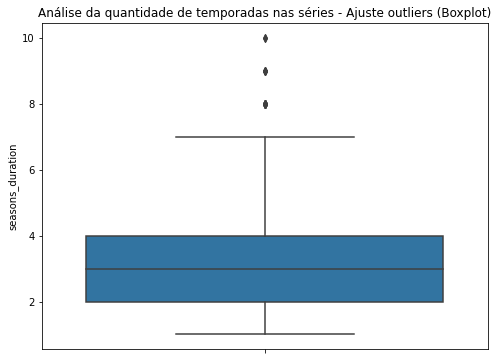

In [52]:
plt.figure(figsize=(8,6))
sns.boxplot(y='seasons_duration', data=series_join)
plt.title('Análise da quantidade de temporadas nas séries - Ajuste outliers (Boxplot)')

Agora temos os ajustes para ambas as features com maior ruído no novo dataset:

In [53]:
series_join.describe()

,IMDB_Rating,ep_duration,seasons_duration
count,367.000000,371.000000,423.000000
mean,7.632425,42.576819,3.089835
std,0.903219,14.001791,1.953601
min,3.200000,4.000000,1.000000
25%,7.200000,30.000000,2.000000
50%,7.800000,43.000000,3.000000
75%,8.250000,52.000000,4.000000
max,9.500000,92.000000,10.000000


Temos, em **média**:

* Avaliação de **7.63** no IMDB para as séries presentes no dataset;

* Duração dos episódios das séries de, aproximadamente, **43 minutos**;

* Duração das séries é de, aproximadamente, **3 temporadas**;

### Top 10 - Melhores séries (por avaliação no IMDB)

In [54]:
top10_series = series_join.nlargest(10, columns='IMDB_Rating').sort_values(by='IMDB_Rating', ascending=False)
top10_series.reset_index(drop=True, inplace=True)
top10_series.set_index('title', inplace=True)
top10_series

,country,release_year,year_added,rating,IMDB_Rating,ep_duration,seasons_duration
title,,,,,,,
Breaking Bad,United States,2013,2013,TV-MA,9.5,49.0,5.0
Avatar: The Last Airbender,United States,2007,2020,TV-Y7,9.2,23.0,3.0
Sherlock,"United Kingdom, United States",2017,2017,TV-14,9.1,88.0,4.0
Yeh Meri Family,India,2018,2018,TV-PG,9.1,30.0,1.0
Ramayan,India,2012,2018,TV-14,9.1,30.0,1.0
College Romance,India,2018,2019,TV-MA,8.9,30.0,1.0
Black Mirror,United Kingdom,2019,2019,TV-MA,8.8,60.0,5.0
Narcos,"United States, Colombia, Mexico",2017,2017,TV-MA,8.8,49.0,3.0
Peaky Blinders,United Kingdom,2019,2019,TV-MA,8.8,60.0,5.0


### Hipóteses: existe relação entre a quantidade de temporadas com a avaliação da série? E entre a duração média dos episódios com a avaliação? Se sim, positiva ou negativa?

Text(0.5, 1.0, 'Mapa de calor da correlação entre as features das séries Netflix')

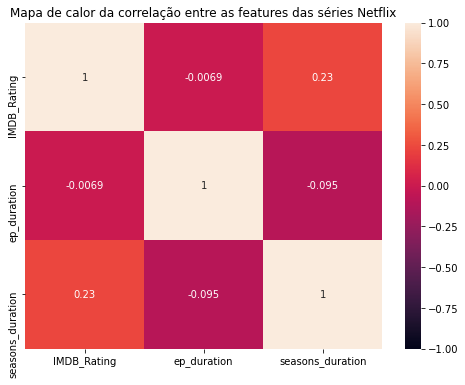

In [59]:
plt.figure(figsize=(8,6))

hm_corr = sns.heatmap(series_join.corr(), vmin=-1, vmax=1, annot=True)

hm_corr.set_title('Mapa de calor da correlação entre as features das séries Netflix')

Observando o mapa de calor acima com as correlações, percebemos primeiramente, que a correlação entre a avaliação da série e a duração dos episódios é fraquíssima. Entretanto, observamos uma correlação positiva (relativamente fraca, porém existente) entre a quantidade de temporadas de uma série e sua avaliação.

Vejamos abaixo, em detalhes, a relação entre as features:

* Duração da série em temporadas x avaliação (no detalhe)

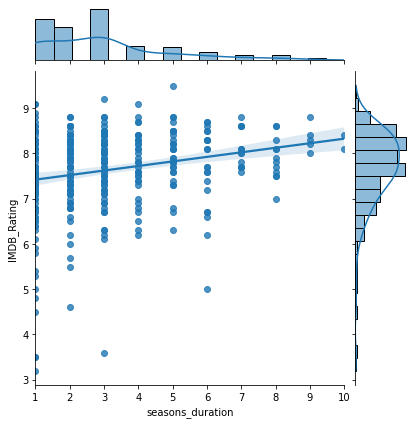

In [56]:
sns.jointplot(x='seasons_duration', y='IMDB_Rating', data=series_join, kind='reg')

* Duração média dos episódios da série x avaliação (no detalhe)

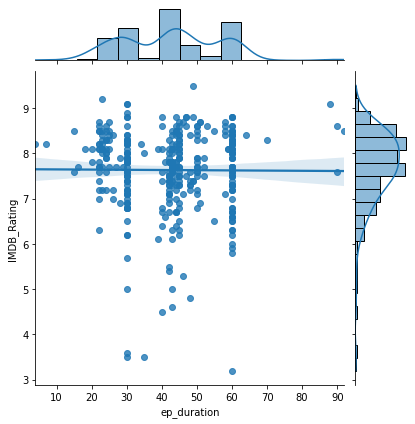

In [60]:
sns.jointplot(x='ep_duration', y='IMDB_Rating', data=series_join, kind='reg')

Temos a tendência, dessa forma, de que séries mais longas em temporadas são melhores avaliadas pelo público geral. Porém, abrimos também margem à interpretação de que boas avaliações do público sobre as primeiras temporadas também incentivam os diretores a produzirem novas temporadas!

### Hipótese: As avaliações variam por categorias de classificaçoes indicativas?

<AxesSubplot:xlabel='rating', ylabel='IMDB_Rating'>

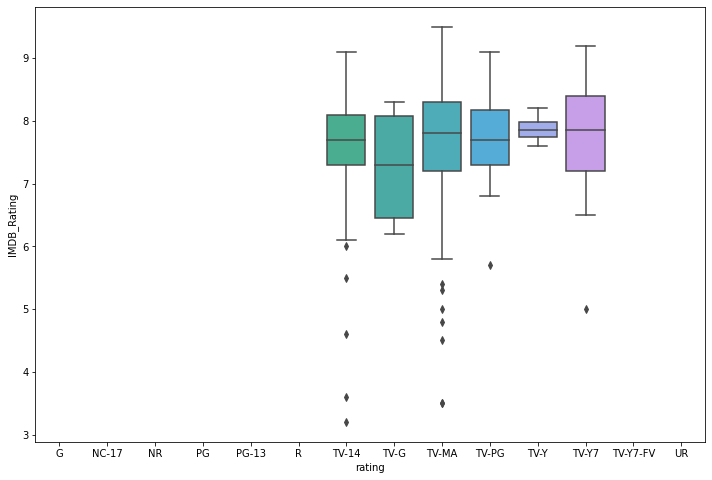

In [62]:
plt.figure(figsize=(12,8))

sns.boxplot(x='rating', y='IMDB_Rating', data=series_join)

Com a análise do Boxplot acima, percebemos que não há grandes variações nas notas de avaliação das séries entre diferentes classificações indicativas.

Uma ligeira discrepância pode ser observada na classificação 'TV-G', na qual as avaliações apresentam notas médias um pouco menores. Entretanto, praticamente todas ficam na faixa de 7.5 a 8.0.

### Hipótese: existe alguma relação entre a "idade" da série (diferença entre o ano em que foi incluída no Netflix e o ano em que foi produzida) com a avaliação média da mesma no IMDB?

Para viabilizar essa análise, criaremos uma nova coluna no dataset chamada 'anos_desde_lancamento', para registrar o intervalo de tempo citado acima, na hipótese:

In [68]:
series_join['year_added'] = pd.to_numeric(series_join['year_added'], errors='coerce')
series_join = series_join.dropna(subset=['year_added'])
series_join['year_added'] = series_join['year_added'].astype(int)

series_join['release_year'] = pd.to_numeric(series_join['release_year'], errors='coerce')
series_join = series_join.dropna(subset=['release_year'])
series_join['release_year'] = series_join['release_year'].astype(int)

series_join['anos_desde_lancamento'] = series_join['year_added'] - series_join['release_year']

<ipython-input-68-9e2018100fe2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series_join['year_added'] = series_join['year_added'].astype(int)
<ipython-input-68-9e2018100fe2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series_join['release_year'] = pd.to_numeric(series_join['release_year'], errors='coerce')


0    0
1    1
2    0
3    0
4    5
Name: anos_desde_lancamento, dtype: int32

In [70]:
series_join.head()

,title,country,release_year,year_added,rating,IMDB_Rating,ep_duration,seasons_duration,anos_desde_lancamento
0,Breaking Bad,United States,2013,2013,TV-MA,9.5,49.0,5.0,0
1,The Walking Dead,United States,2018,2019,TV-MA,8.2,44.0,9.0,1
2,Stranger Things,United States,2019,2019,TV-14,8.7,51.0,3.0,0
3,Sherlock,"United Kingdom, United States",2017,2017,TV-14,9.1,88.0,4.0,0
4,Dexter,United States,2013,2018,TV-MA,8.6,53.0,8.0,5


* Agora, com a nova coluna, podemos calcular a correlação entre as features:

In [71]:
series_join['anos_desde_lancamento'].corr(series_join['IMDB_Rating'])

0.10105966502024141

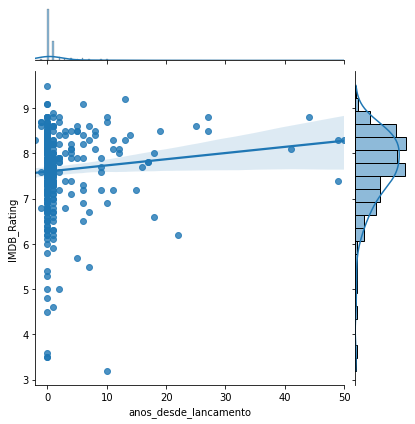

In [72]:
sns.jointplot(x='anos_desde_lancamento', y='IMDB_Rating', data=series_join, kind='reg')

Percebemos, tanto pelo valor retornado quando visualmente, na tendência de regressão que, apensar de uma relação fraca, seriados mais "antigos" (de acordo com a diferença entre sua produção e disponibilidade na plataforma) têm a tendência de serem melhor avaliados pelo público.